In [2]:
import tdms
import imp
imp.reload(tdms)
import plot
import functions
import numpy as np
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Activation current-voltage relationship (I-V)

In [3]:
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/D2-vc-060717-vc2-1.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1701-9VCLAMPNACURRENT.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1702-1.tdms")
data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-IV_Na_LF1-3-357507899.tdms")

In [20]:
holding = -80
erev = 20
pulsedelay = 50
pulsedur = 200
print(data['dt'])

0.04


<IPython.core.display.Javascript object>


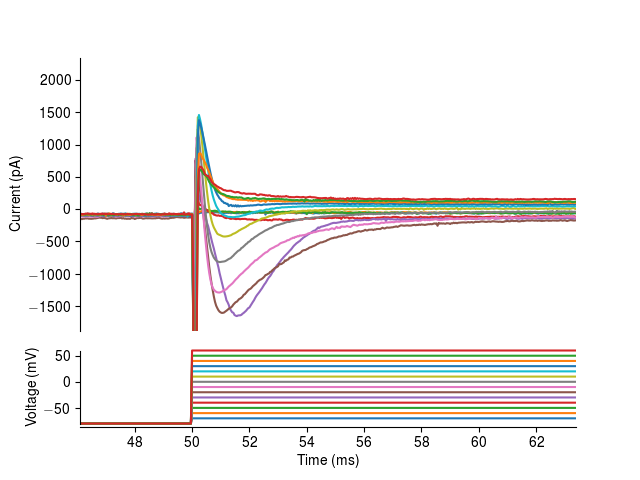

<IPython.core.display.Javascript object>


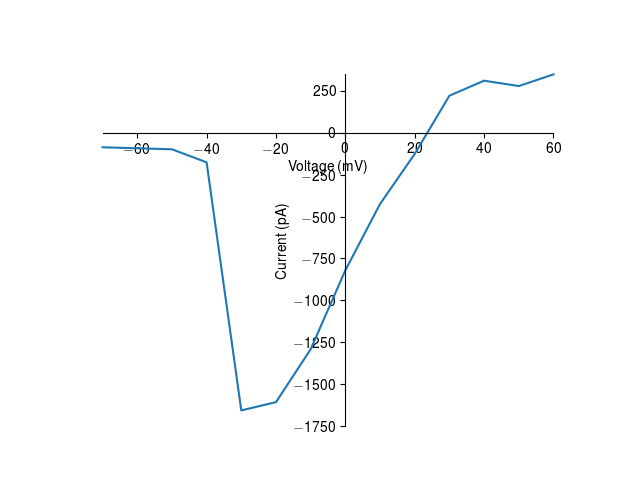

<IPython.core.display.Javascript object>


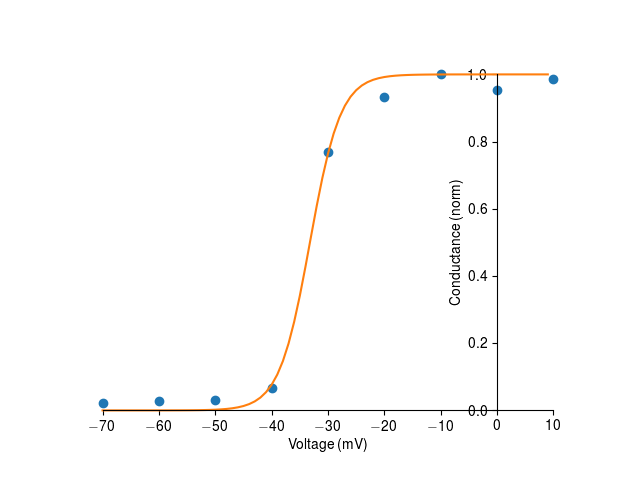

In [22]:
fig, axi, axv = plot.plot_traces(mode='vclamp')

pulses = []
peaks = []

dt = data['dt']
for sweep, command in zip(data['AI0'], data['AO0']): 
    pulsebase = np.mean(command[:int(pulsedelay/dt)])
    pulsemax = np.max(command[:int((pulsedelay+pulsedur)/dt)]-pulsebase)
    pulsemin = np.min(command[:int((pulsedelay+pulsedur)/dt)]-pulsebase)
    if np.abs(pulsemax) > np.abs(pulsemin):
        pulseamp = pulsemax+holding
    else:
        pulseamp = pulsemin+holding
    pulses.append(pulseamp)

    baseline = np.mean(sweep[:int(pulsedelay/dt)])
    maxpeak = np.max(sweep[int((pulsedelay+0.9)/dt):int((pulsedelay+50.0)/dt)])
    minpeak = np.min(sweep[int((pulsedelay+0.9)/dt):int((pulsedelay+50.0)/dt)])
    if np.abs(minpeak) > np.abs(maxpeak):
        peaks.append(minpeak)
    else:
        peaks.append(maxpeak)

    times = np.arange(sweep.shape[0])*data['dt']
    axi.plot(times, sweep)
    axv.plot(times, holding + command)

fig, ax = plot.plot_iv()
ax.plot(pulses, peaks)

pulses = np.array(pulses)
peaks = np.array(peaks)[pulses < erev]
pulses = pulses[pulses < erev]

# Plot conductance-voltage relationship
g, gfit = functions.gv(np.array(peaks), np.array(pulses), erev)
curverange = np.arange(np.min(pulses), np.max(pulses), 1.0)
curve = functions.fboltz_up(gfit, curverange)

fig, ax = plot.plot_iv(ylabel="Conductance (norm)")
ax.plot(pulses, g, 'o')
ax.plot(curverange, curve)

plt.show()